<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Water_Potability_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityakadiwal/water-potability")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'water-potability' dataset.
Path to dataset files: /kaggle/input/water-potability


In [3]:
df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')

**Data Evaluation and Preprocessing**

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [7]:
df.shape

(3276, 10)

In [19]:
potability_counts = df['Potability'].value_counts()
print("Number of 0s in Potability column:", potability_counts[0])
print("Number of 1s in Potability column:", potability_counts[1])

Number of 0s in Potability column: 1998
Number of 1s in Potability column: 1278


**Potable --> 1**

**Not Potable --> 0**

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [11]:
for col in ['ph', 'Sulfate', 'Trihalomethanes']:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1279031460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [12]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786     0.390110  
std       80.824064        3.308162        15.769958     0.780382     0.487849  


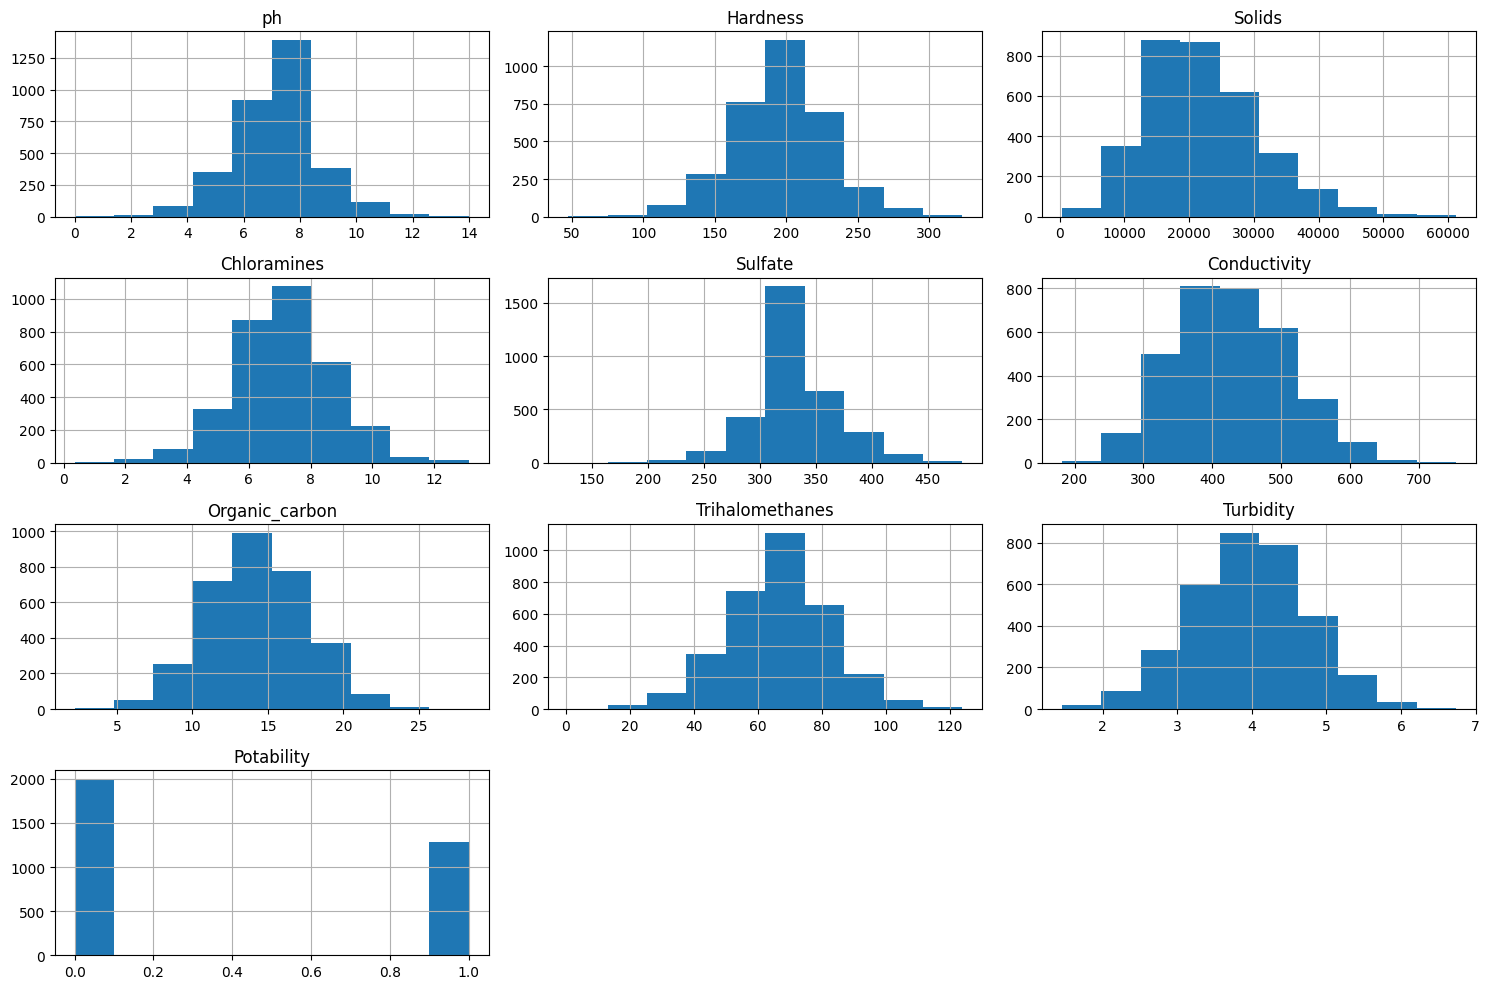

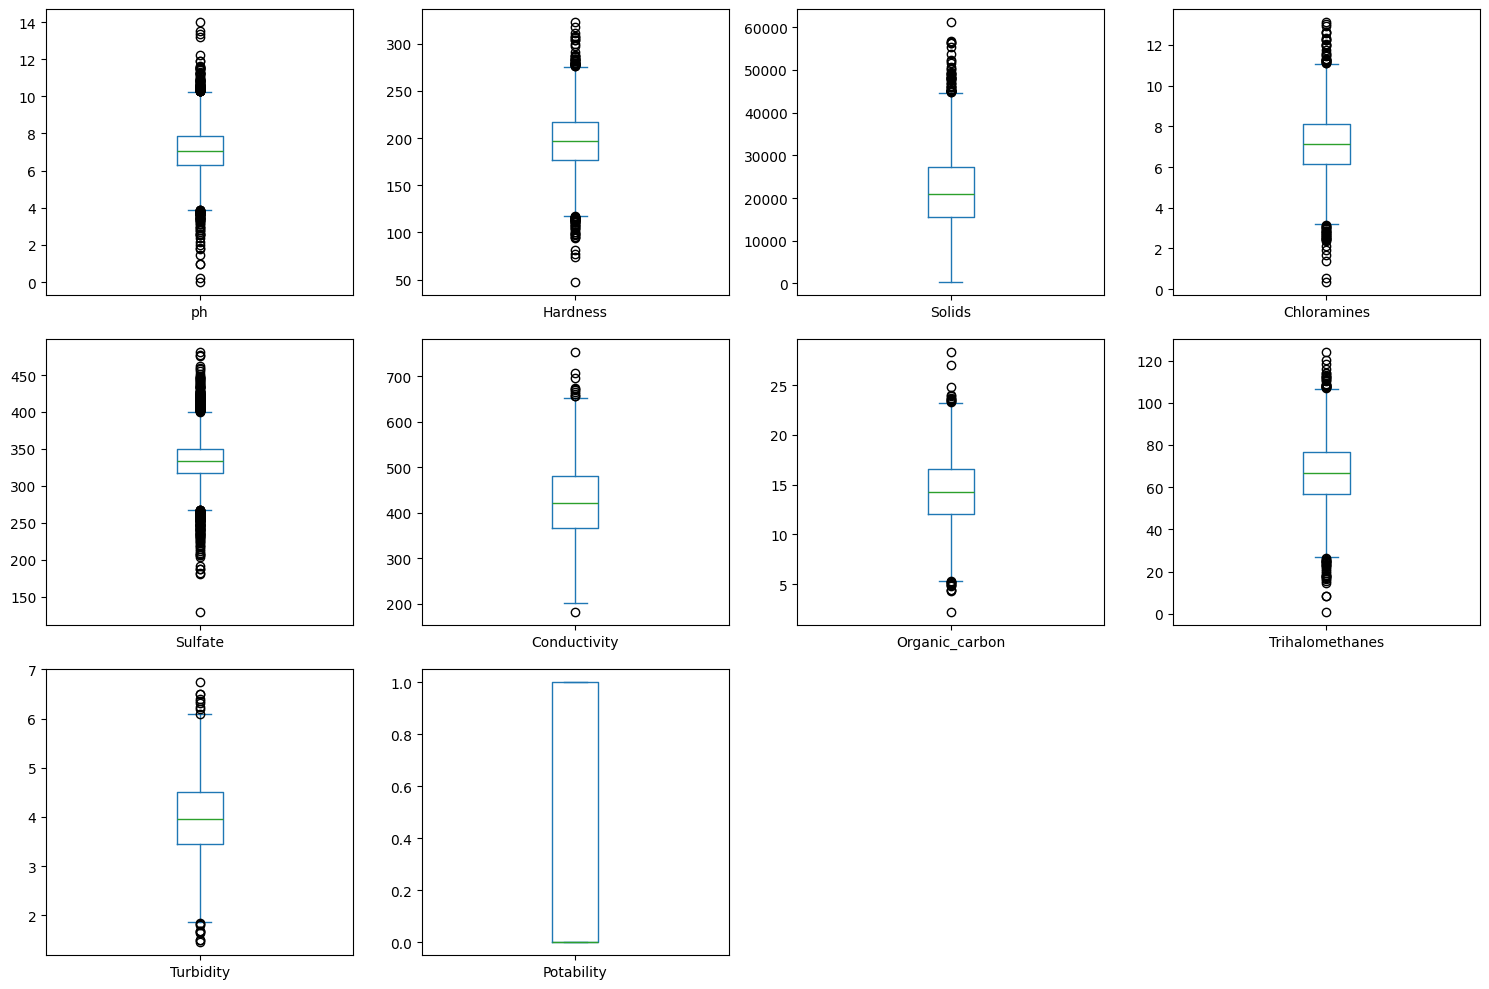

In [14]:
print(df.describe())

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

df.plot(kind='box', subplots=True, layout=(3, 4), figsize=(15, 10))
plt.tight_layout()
plt.show()

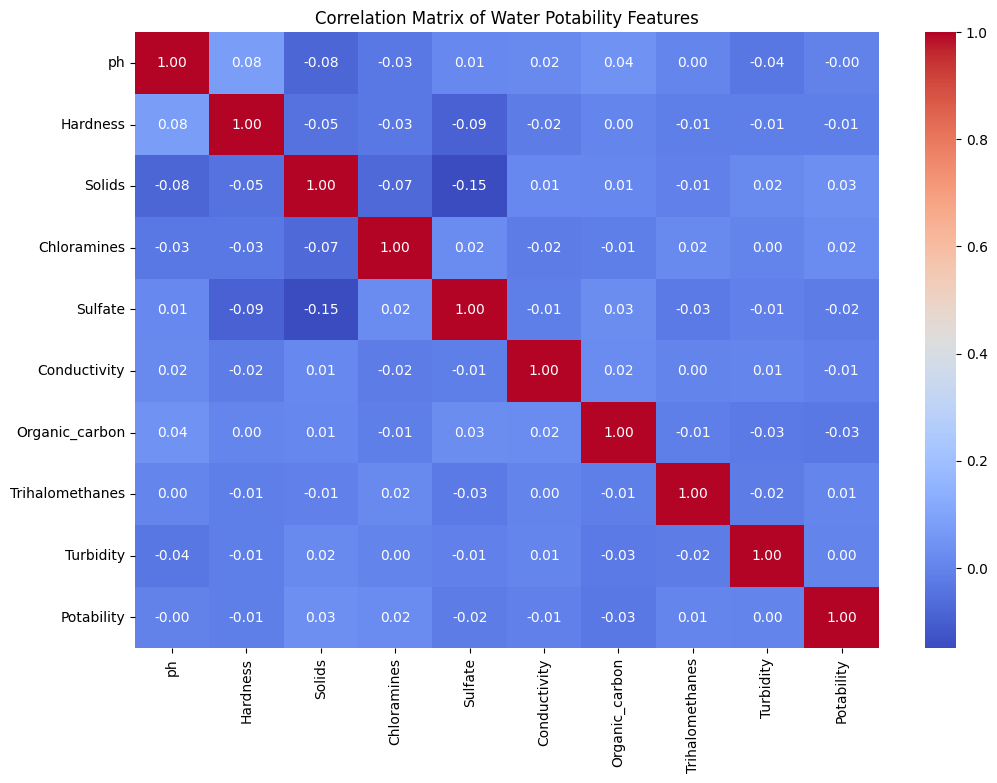

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Water Potability Features')
plt.show()

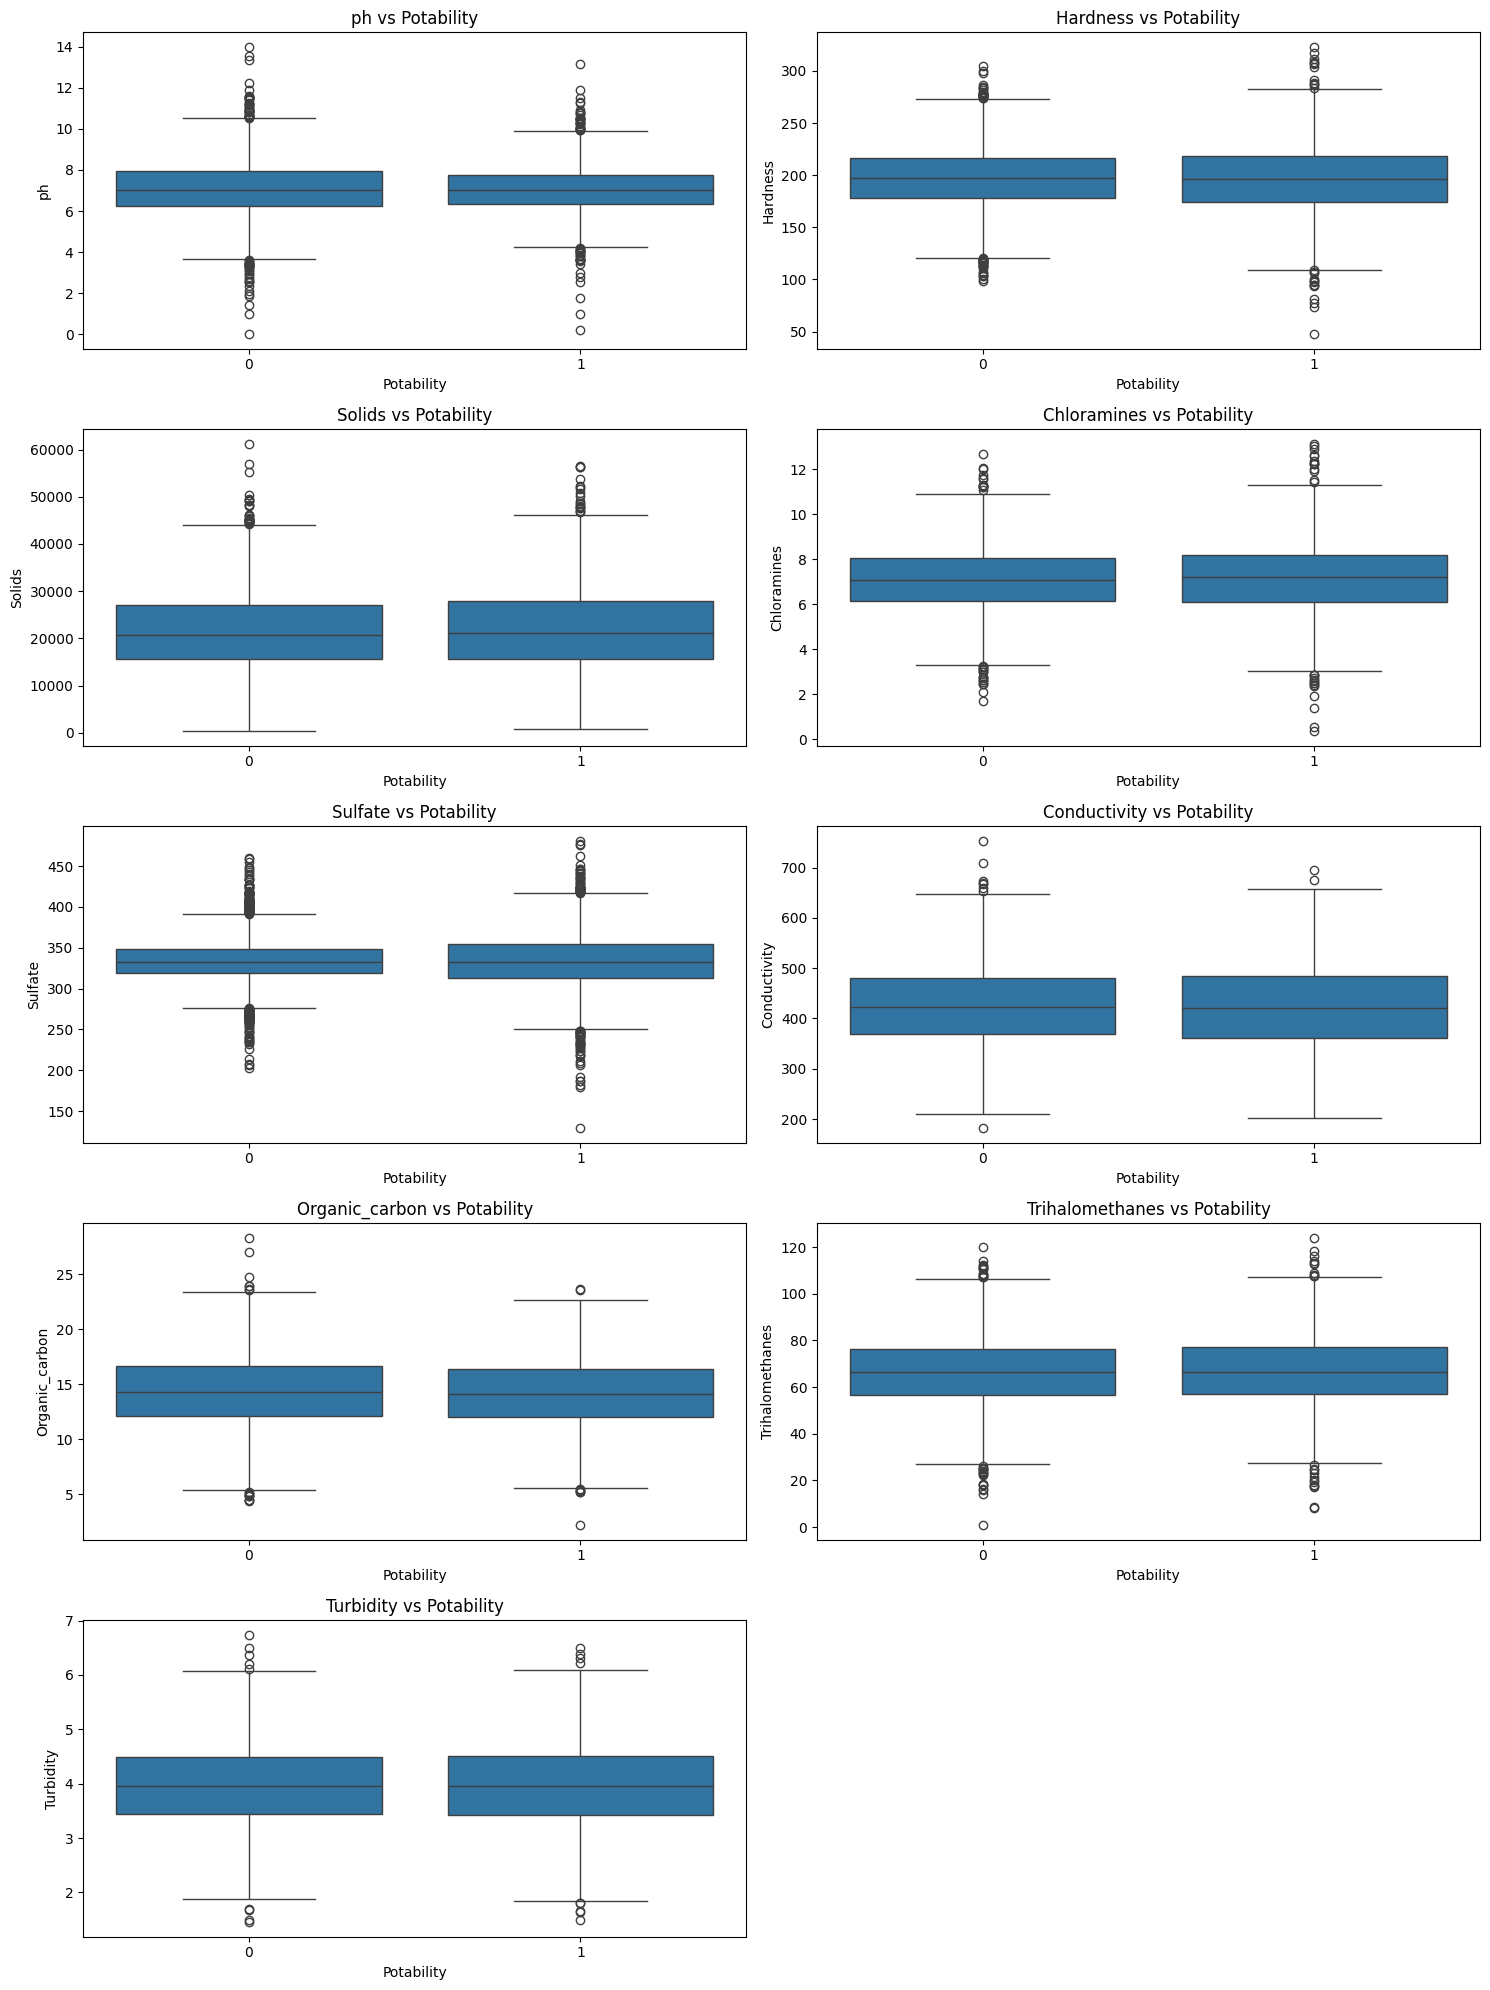

Mean values for each feature based on Potability:
                  ph    Hardness        Solids  Chloramines     Sulfate  \
Potability                                                                
0           7.077736  196.733292  21777.490788     7.092175  334.200184   
1           7.068655  195.800744  22383.991018     7.169338  332.683125   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Potability                                                            
0             426.730454       14.364335        66.320635   3.965800  
1             425.383800       14.160893        66.543247   3.968328  


In [17]:
features = df.columns[:-1]
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x='Potability', y=feature, data=df)
    plt.title(f'{feature} vs Potability')
plt.tight_layout()
plt.show()

print("Mean values for each feature based on Potability:")
print(df.groupby('Potability')[features].mean())

**Splitting the data into Target and Features**

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training the models**

In [22]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [23]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train models
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

catb_clf = CatBoostClassifier(verbose=0)
catb_clf.fit(X_train, y_train)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 1034, number of negative: 1586
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394656 -> initscore=-0.427780
[LightGBM] [Info] Start training from score -0.427780


RandomForestClassifier()

**Model Evaluation**

In [24]:
from sklearn.metrics import accuracy_score

model_accuracies = {}

models = {
    'Logistic Regression': log_reg,
    'XGBoost': xgb_clf,
    'LightGBM': lgbm_clf,
    'CatBoost': catb_clf,
    'Decision Tree': dt_clf,
    'Random Forest': rf_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

print("Model Accuracy Scores:")
print(model_accuracies)

Model Accuracy Scores:
{'Logistic Regression': 0.6280487804878049, 'XGBoost': 0.6570121951219512, 'LightGBM': 0.6737804878048781, 'CatBoost': 0.6859756097560976, 'Decision Tree': 0.5655487804878049, 'Random Forest': 0.676829268292683}


In [25]:
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]
best_model = models[best_model_name]

print(f"The best performing model is: {best_model_name} with an accuracy of {best_accuracy:.4f}")

The best performing model is: CatBoost with an accuracy of 0.6860
